# Ryan Razaan Gunawan - 2301878290 - LD01

Quiz 1 Machine Learning No. 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv',sep = '\s+',header = None) # separator space and comma
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


# Data Cleaning

In [3]:
df = df.astype(float)
df.shape

(506, 14)

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

In [5]:
df.dropna()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


Fixing Outlier and Scaling the Dataset

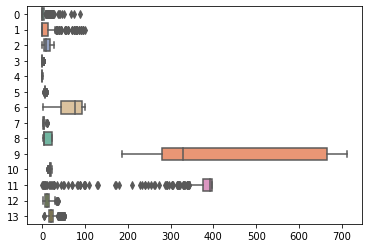

In [7]:
outliers = sns.boxplot(data=df, orient="h", palette="Set2")

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3-Q1
print(IQR)

0       3.595038
1      12.500000
2      12.910000
3       0.000000
4       0.175000
5       0.738000
6      49.050000
7       3.088250
8      20.000000
9     387.000000
10      2.800000
11     20.847500
12     10.005000
13      7.975000
dtype: float64


In [9]:
# Remove Outlier from the dataset
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
df.shape

(268, 14)

In [10]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,268.000000,268.000000,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,1.022245,3.942164,10.664888,0.0,0.534082,6.167108,66.038806,4.011724,7.011194,362.231343,18.802612,389.079813,11.973246,21.397761
std,1.961044,8.687210,6.346300,0.0,0.097127,0.427216,26.723486,1.769263,6.749384,140.349399,1.750728,11.132638,5.408903,4.714913
min,0.006320,0.000000,1.380000,0.0,0.409000,4.903000,2.900000,1.345900,1.000000,188.000000,14.700000,344.910000,2.940000,8.500000
25%,0.086420,0.000000,5.860000,0.0,0.453000,5.890500,45.775000,2.508075,4.000000,277.000000,17.800000,386.740000,7.857500,18.650000
50%,0.171565,0.000000,8.560000,0.0,0.520000,6.127000,70.300000,3.671500,5.000000,307.000000,19.100000,393.520000,11.045000,21.100000
75%,0.596213,0.000000,18.100000,0.0,0.581000,6.422250,90.325000,5.287300,6.000000,403.000000,20.200000,396.900000,14.727500,23.725000
max,8.716750,30.000000,27.740000,0.0,0.871000,7.416000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,36.200000


Scaling using Min-Max Normalization

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(df)
df = scaler.transform(df)
df = pd.DataFrame(df)

In [12]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
count,268.000000,268.000000,268.000000,268.0,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.116633,0.131405,0.352234,0.0,0.270740,0.503028,0.650245,0.338431,0.261356,0.333138,0.631171,0.849583,0.324121,0.465623
std,0.225137,0.289574,0.240755,0.0,0.210232,0.170002,0.275216,0.224611,0.293451,0.268354,0.269343,0.214130,0.194076,0.170213
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.009196,0.000000,0.169954,0.0,0.095238,0.392957,0.441555,0.147540,0.130435,0.170172,0.476923,0.804578,0.176444,0.366426
50%,0.018971,0.000000,0.272382,0.0,0.240260,0.487067,0.694130,0.295239,0.173913,0.227533,0.676923,0.934987,0.290814,0.454874
75%,0.067723,0.000000,0.634294,0.0,0.372294,0.604556,0.900360,0.500368,0.217391,0.411090,0.846154,1.000000,0.422946,0.549639
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.drop(3,axis=1, inplace=True)

Now that the data are cleaned and scaled, we can go ahead into data preparation

# Data Preparation

Search for high correlation data to Use

          0         1         2         4         5         6         7   \
0   1.000000 -0.210341  0.494892  0.616244 -0.055495  0.349502 -0.386631   
1  -0.210341  1.000000 -0.318908 -0.407341  0.145068 -0.317293  0.602665   
2   0.494892 -0.318908  1.000000  0.687050 -0.227952  0.479729 -0.627017   
4   0.616244 -0.407341  0.687050  1.000000 -0.253273  0.625244 -0.715439   
5  -0.055495  0.145068 -0.227952 -0.253273  1.000000 -0.142963  0.165074   
6   0.349502 -0.317293  0.479729  0.625244 -0.142963  1.000000 -0.607353   
7  -0.386631  0.602665 -0.627017 -0.715439  0.165074 -0.607353  1.000000   
8   0.896524 -0.104204  0.413444  0.475386  0.035247  0.224189 -0.254432   
9   0.799501 -0.240486  0.605088  0.601246 -0.061476  0.363663 -0.440637   
10  0.236846 -0.233578  0.251323  0.105761 -0.015428  0.185346 -0.200926   
11 -0.112067  0.051526 -0.165349 -0.181690  0.126908 -0.088601  0.077007   
12  0.313103 -0.216148  0.484326  0.522128 -0.625223  0.567426 -0.384235   
13 -0.324550

<AxesSubplot:>

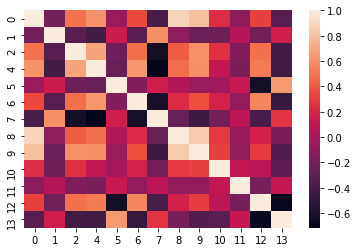

In [14]:
corr = df.corr()
print(corr)
sns.heatmap(corr, 
         xticklabels=corr.columns, 
         yticklabels=corr.columns)

We're gonna use the top 5 Brightest/Highest scoring features for the 13th column as our main features

In [15]:
main_features = df[[5,7,1,11,13]]

In [16]:
main_features.describe()

,5,7,1,11,13
count,268.000000,268.000000,268.000000,268.000000,268.000000
mean,0.503028,0.338431,0.131405,0.849583,0.465623
std,0.170002,0.224611,0.289574,0.214130,0.170213
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.392957,0.147540,0.000000,0.804578,0.366426
50%,0.487067,0.295239,0.000000,0.934987,0.454874
75%,0.604556,0.500368,0.000000,1.000000,0.549639
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
features = df[[5,7,1,11]]
label = df[13]

In [18]:
features.describe()

,5,7,1,11
count,268.000000,268.000000,268.000000,268.000000
mean,0.503028,0.338431,0.131405,0.849583
std,0.170002,0.224611,0.289574,0.214130
min,0.000000,0.000000,0.000000,0.000000
25%,0.392957,0.147540,0.000000,0.804578
50%,0.487067,0.295239,0.000000,0.934987
75%,0.604556,0.500368,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [19]:
label.describe()

count    268.000000
mean       0.465623
std        0.170213
min        0.000000
25%        0.366426
50%        0.454874
75%        0.549639
max        1.000000
Name: 13, dtype: float64

Splitting the Dataset

In [20]:
x_train, x_test, y_train, y_test = train_test_split(features,label, test_size = 0.2)

That concludes all we need for the data preparation

# Multivariate Linear Regression (MLR)

In [29]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error

regressor = linear_model.LinearRegression()
regressor.fit(x_train, y_train)

dataset_y_predicted = regressor.predict(x_test)
print('MSE: %.4f' % 
      mean_squared_error(y_test, dataset_y_predicted))

MSE: 0.0139


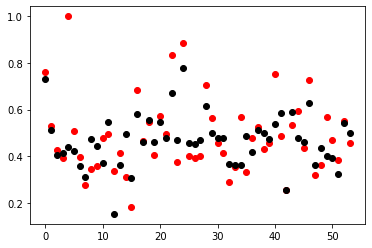

In [22]:
plt.figure()
plt.scatter(x=list(range(0, len(y_test))), y=y_test, color='red')         
plt.scatter(x=list(range(0, len(dataset_y_predicted))), y=dataset_y_predicted, color='black')
plt.show()